In [ ]:
# parameter for papermill
week = 'updated'

We chose 'updated' as our parameter because the code itself is already design to compare the most recent two weeks for question 6 and 7. Questions from 1 to 5 does not require any weekly updates because it is comparison analysis of all collections weeks that has been added.

# Hospital Data Visualization

In [1]:
# All libraries should be downloaded.
import pandas as pd
import matplotlib as plt
import psycopg2
from credentials import DBNAME, USER, PASSWORD


In [2]:
# Getting Hospital Data
import pandas as pd
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_1 = "SELECT * FROM hospital;"
query_2 = "SELECT * FROM beds"
query_3 = "SELECT * FROM quality"

hospital_df = pd.read_sql(query_1, conn)
beds_df = pd.read_sql(query_2, conn)
quality_df = pd.read_sql(query_3, conn)

conn.close()

<ipython-input-2-4c40127f9b27>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hospital_df = pd.read_sql(query_1, conn)
<ipython-input-2-4c40127f9b27>:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)
<ipython-input-2-4c40127f9b27>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  quality_df = pd.read_sql(query_3, conn)


## Data Analysis

### Question 1

<ipython-input-3-76eae4948ca5>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


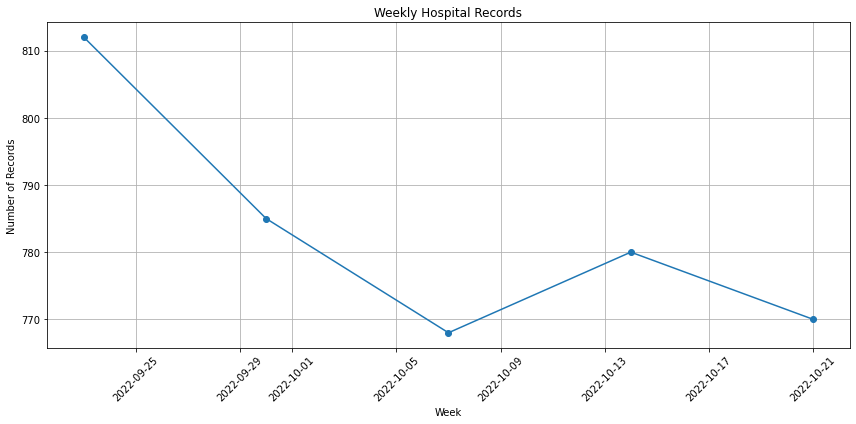

In [3]:
# A summary of how many hospital records were loaded in the week selected by the user, and how that compares to previous weeks.

import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_2 = "SELECT * FROM beds"

beds_df = pd.read_sql(query_2, conn)

conn.close()

beds_df['collection_week'] = pd.to_datetime(beds_df['collection_week'])
weekly_counts = beds_df.groupby('collection_week').size().reset_index(name='record_count')
weekly_counts.sort_values('collection_week', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(weekly_counts['collection_week'], weekly_counts['record_count'], marker='o')
plt.xlabel('Week')
plt.ylabel('Number of Records')
plt.title('Weekly Hospital Records')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()  
plt.show()

### Question 2

In [4]:
# A table summarizing the number of adult and pediatric beds available that week, the number used, and the number used by patients with COVID, compared to the 4 most recent weeks.

import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_2 = "SELECT * FROM beds"

beds_df = pd.read_sql(query_2, conn)

conn.close()

weekly_summary = beds_df.groupby('collection_week').agg({
    'all_adult_hospital_beds_7_day_avg': 'sum',
    'all_pediatric_inpatient_beds_7_day_avg': 'sum',
    'all_adult_hospital_inpatient_bed_occupied_7_day_coverage': 'sum',
    'all_pediatric_inpatient_bed_occupied_7_day_avg': 'sum',
    'inpatient_beds_used_covid_7_day_avg': 'sum'
}).reset_index()

weekly_summary.sort_values('collection_week', ascending=False, inplace=True)
comparison_weeks = weekly_summary.head(5)
comparison_weeks

<ipython-input-4-e965377a9bac>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


,collection_week,all_adult_hospital_beds_7_day_avg,all_pediatric_inpatient_beds_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_coverage,all_pediatric_inpatient_bed_occupied_7_day_avg,inpatient_beds_used_covid_7_day_avg
4,2022-10-21,176998.3,21347.3,5325.0,15698.5,12810.2
3,2022-10-14,179385.3,21886.9,5452.0,15780.2,12696.0
2,2022-10-07,178667.4,22210.6,5374.0,15571.4,12468.0
1,2022-09-30,183362.3,22317.5,5483.0,15486.3,13212.7
0,2022-09-23,185298.4,21822.2,5674.0,14991.1,13754.6


### Question 3

In [11]:
# A graph or table summarizing the fraction of beds in use by hospital quality rating, so we can compare high-quality and low-quality hospitals.

import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_2 = "SELECT * FROM beds"
query_3 = "SELECT * FROM quality"

beds_df = pd.read_sql(query_2, conn)
quality_df = pd.read_sql(query_3, conn)

conn.close()

merged_df = pd.merge(beds_df, quality_df, left_on='hospital_pk', right_on='facility_id')

merged_df['total_beds'] = merged_df['all_adult_hospital_beds_7_day_avg'] + merged_df['all_pediatric_inpatient_beds_7_day_avg']
merged_df['beds_in_use'] = merged_df['all_adult_hospital_inpatient_bed_occupied_7_day_coverage'] + merged_df['all_pediatric_inpatient_bed_occupied_7_day_avg']

merged_df['fraction_beds_in_use'] = merged_df['beds_in_use'] / merged_df['total_beds']

quality_bed_usage = merged_df.groupby('quality_rating')['fraction_beds_in_use'].mean().reset_index()

quality_bed_usage

<ipython-input-11-817d8f5356eb>:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)
<ipython-input-11-817d8f5356eb>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  quality_df = pd.read_sql(query_3, conn)


,quality_rating,fraction_beds_in_use
0,1.0,0.061611
1,2.0,0.072718
2,3.0,0.070728
3,4.0,0.080727
4,5.0,0.065875


### Question 4

<ipython-input-6-cafe96b1ed40>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


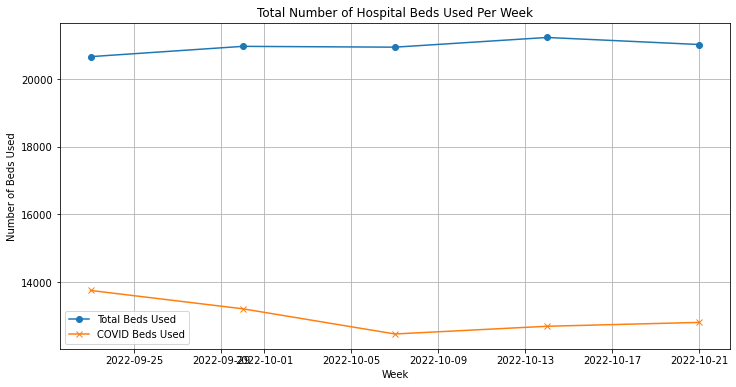

In [6]:
# A plot of the total number of hospital beds used per week, over all time up to the selected week, split into all cases and COVID cases.

import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_2 = "SELECT * FROM beds"

beds_df = pd.read_sql(query_2, conn)

conn.close()

beds_df['collection_week'] = pd.to_datetime(beds_df['collection_week'])

weekly_beds_usage = beds_df.groupby('collection_week').agg({
    'all_adult_hospital_inpatient_bed_occupied_7_day_coverage': 'sum',
    'all_pediatric_inpatient_bed_occupied_7_day_avg': 'sum',
    'inpatient_beds_used_covid_7_day_avg': 'sum'
}).reset_index()

weekly_beds_usage['total_beds_used'] = (weekly_beds_usage['all_adult_hospital_inpatient_bed_occupied_7_day_coverage'] +
                                        weekly_beds_usage['all_pediatric_inpatient_bed_occupied_7_day_avg'])

plt.figure(figsize=(12, 6))
plt.plot(weekly_beds_usage['collection_week'], weekly_beds_usage['total_beds_used'], label='Total Beds Used', marker='o')
plt.plot(weekly_beds_usage['collection_week'], weekly_beds_usage['inpatient_beds_used_covid_7_day_avg'], label='COVID Beds Used', marker='x')
plt.xlabel('Week')
plt.ylabel('Number of Beds Used')
plt.title('Total Number of Hospital Beds Used Per Week')
plt.legend()
plt.grid(True)
plt.show()

### Question 5

In [13]:
# A map showing the number of COVID cases by state (the first two digits of a hospital FIPS code is its state)

import pandas as pd
import psycopg
import folium
from folium.plugins import HeatMap
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_1 = "SELECT * FROM hospital"
query_2 = "SELECT * FROM beds"

hospital_df = pd.read_sql(query_1, conn)
beds_df = pd.read_sql(query_2, conn)

conn.close()

state_code_to_abbrev = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR',
    '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
    '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI',
    '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA',
    '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME',
    '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN',
    '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE',
    '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM',
    '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH',
    '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI',
    '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX',
    '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA',
    '54': 'WV', '55': 'WI', '56': 'WY'
}

state_coords = {
    'AL': [32.806671, -86.791130], 'AK': [61.370716, -152.404419], 'AZ': [33.729759, -111.431221], 'AR': [34.969704, -92.373123],
    'CA': [36.116203, -119.681564], 'CO': [39.059811, -105.311104], 'CT': [41.597782, -72.755371], 'DE': [39.318523, -75.507141],
    'FL': [27.766279, -81.686783], 'GA': [33.040619, -83.643074], 'HI': [21.094318, -157.498337], 'ID': [44.240459, -114.478828],
    'IL': [40.349457, -88.986137], 'IN': [39.849426, -86.258278], 'IA': [42.011539, -93.210526], 'KS': [38.526600, -96.726486],
    'KY': [37.668140, -84.670067], 'LA': [31.169546, -91.867805], 'ME': [44.693947, -69.381927], 'MD': [39.063946, -76.802101],
    'MA': [42.230171, -71.530106], 'MI': [43.326618, -84.536095], 'MN': [45.694454, -93.900192], 'MS': [32.741646, -89.678696],
    'MO': [38.456085, -92.288368], 'MT': [46.921925, -110.454353], 'NE': [41.125370, -98.268082], 'NV': [38.313515, -117.055374],
    'NH': [43.452492, -71.563896], 'NJ': [40.298904, -74.521011], 'NM': [34.840515, -106.248482], 'NY': [42.165726, -74.948051],
    'NC': [35.630066, -79.806419], 'ND': [47.528912, -99.784012], 'OH': [40.388783, -82.764915], 'OK': [35.565342, -96.928917],
    'OR': [44.572021, -122.070938], 'PA': [40.590752, -77.209755], 'RI': [41.680893, -71.511780], 'SC': [33.856892, -80.945007],
    'SD': [44.299782, -99.438828], 'TN': [35.747845, -86.692345], 'TX': [31.054487, -97.563461], 'UT': [40.150032, -111.862434],
    'VT': [44.045876, -72.710686], 'VA': [37.769337, -78.169968], 'WA': [47.400902, -121.490494], 'WV': [38.491226, -80.954570],
    'WI': [44.268543, -89.616508], 'WY': [42.755966, -107.302490]
}

hospital_df['state_code'] = hospital_df['fips_code'].str[:2]

merged_data = pd.merge(beds_df, hospital_df[['hospital_pk', 'state_code']], on='hospital_pk')

merged_data['state_abbrev'] = merged_data['state_code'].map(state_code_to_abbrev)

statewise_covid_cases = merged_data.groupby('state_abbrev')['inpatient_beds_used_covid_7_day_avg'].sum().reset_index()

data = []
for state, cases in zip(statewise_covid_cases['state_abbrev'], statewise_covid_cases['inpatient_beds_used_covid_7_day_avg']):
    if state in state_coords:
        lat, lon = state_coords[state]
        data.append([lat, lon, cases])

folium_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
HeatMap(data).add_to(folium_map)
folium_map

<ipython-input-13-eae7e552ff64>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hospital_df = pd.read_sql(query_1, conn)
<ipython-input-13-eae7e552ff64>:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


### Question 6

In [6]:
# A table of the states in which the number of cases has increased by the most since last week

import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_1 = "SELECT * FROM hospital"
query_2 = "SELECT * FROM beds"

hospital_df = pd.read_sql(query_1, conn)
beds_df = pd.read_sql(query_2, conn)

conn.close()

beds_df['collection_week'] = pd.to_datetime(beds_df['collection_week'])

last_two_weeks = beds_df['collection_week'].drop_duplicates().nlargest(2).sort_values()

recent_data = beds_df[beds_df['collection_week'].isin(last_two_weeks)]

merged_data = pd.merge(recent_data, hospital_df[['hospital_pk', 'state']], on='hospital_pk')

grouped_data = merged_data.groupby(['state', 'collection_week'])['inpatient_beds_used_covid_7_day_avg'].sum().reset_index()

pivot_data = grouped_data.pivot(index='state', columns='collection_week', values='inpatient_beds_used_covid_7_day_avg')

pivot_data['case_increase'] = pivot_data[last_two_weeks.iloc[1]] - pivot_data[last_two_weeks.iloc[0]]

pivot_data = pivot_data.sort_values('case_increase', ascending=False)

final_table = pivot_data[['case_increase']].reset_index()

final_table.head()

<ipython-input-6-fe8ff9c8e839>:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hospital_df = pd.read_sql(query_1, conn)
<ipython-input-6-fe8ff9c8e839>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


collection_week,state,case_increase
0,NY,80.9
1,IL,77.7
2,MO,69.0
3,MN,43.6
4,NJ,34.0


### Question 7

In [2]:
# A table of the hospitals (including names and locations) with the largest changes in COVID cases in the last week

import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_1 = "SELECT * FROM hospital"
query_2 = "SELECT * FROM beds"

hospital_df = pd.read_sql(query_1, conn)
beds_df = pd.read_sql(query_2, conn)

conn.close()

beds_df['collection_week'] = pd.to_datetime(beds_df['collection_week'])

distinct_weeks = beds_df['collection_week'].drop_duplicates().nlargest(2).sort_values()

recent_data_corrected = beds_df[beds_df['collection_week'].isin(distinct_weeks)]

grouped_data_corrected = recent_data_corrected.groupby(['hospital_pk', 'collection_week'])['inpatient_beds_used_covid_7_day_avg'].sum().reset_index()

pivot_data_corrected = grouped_data_corrected.pivot(index='hospital_pk', columns='collection_week', values='inpatient_beds_used_covid_7_day_avg')

pivot_data_corrected['case_change'] = pivot_data_corrected[distinct_weeks.iloc[1]] - pivot_data_corrected[distinct_weeks.iloc[0]]

pivot_data_sorted = pivot_data_corrected.sort_values('case_change', ascending=False).reset_index()

final_table = pd.merge(pivot_data_sorted, hospital_df[['hospital_pk', 'hospital_name', 'address', 'city', 'state', 'zip']], on='hospital_pk')

final_table = final_table[['hospital_name', 'address', 'city', 'state', 'zip', 'case_change']]

final_table.head()



<ipython-input-2-868d397c301f>:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hospital_df = pd.read_sql(query_1, conn)
<ipython-input-2-868d397c301f>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


,hospital_name,address,city,state,zip,case_change
0,CAROLINAS MEDICAL CENTER/BEHAV HEALTH,1000 BLYTHE BLVD,CHARLOTTE,NC,28203,29.4
1,NEW YORK-PRESBYTERIAN HOSPITAL,525 EAST 68TH STREET,NEW YORK,NY,10065,24.7
2,GEISINGER MEDICAL CENTER,100 NORTH ACADEMY AVENUE,DANVILLE,PA,17822,17.7
3,MAINE MEDICAL CENTER,22 BRAMHALL ST,PORTLAND,ME,4102,15.8
4,MOUNT SINAI WEST,1000 TENTH AVENUE,NEW YORK,NY,10019,12.3
